Training data created
Classifiers created
Testing accuracy by n for English-Latin1
Testing accuracy by n for French_Francais-Latin1
Testing accuracy by n for Spanish-Latin1
Testing accuracy by n for Italian-Latin1
Testing accuracy by n for German_Deutsch-Latin1


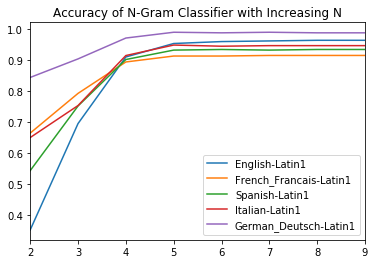

,English-Latin1,French_Francais-Latin1,Spanish-Latin1,Italian-Latin1,German_Deutsch-Latin1
2,0.351240,0.663480,0.542510,0.649156,0.842991
3,0.694215,0.791587,0.751012,0.752345,0.902804
4,0.909091,0.892925,0.900810,0.913696,0.970093
5,0.952479,0.912046,0.931174,0.947467,0.988785
6,0.958678,0.912046,0.933198,0.943715,0.986916
7,0.960744,0.913958,0.931174,0.945591,0.988785
8,0.962810,0.913958,0.933198,0.945591,0.986916
9,0.962810,0.913958,0.933198,0.945591,0.986916


In [15]:
from ngram_classifier import NGramClassifier

from nltk.corpus import udhr

import matplotlib.pyplot as plt
import pandas as pd

LANGUAGES = [ lang for lang in udhr.fileids() if lang.endswith("-Latin1") ]

def accuracy(classifier, language):
    words = set( word.lower() for word in udhr.words(language) if word.isalpha() )
    correct = 0
    n = 0
    for word in words:
        correct += 1 if max(classifier.classifyWord(word))[1] == language else 0
        n += 1
    return float(correct) / float(n)


test_langs = [ 
    "English-Latin1", 
    "French_Francais-Latin1",
    "Spanish-Latin1",
    "Italian-Latin1",
    "German_Deutsch-Latin1"
]

results = pd.DataFrame()

training_data = [ ( lang, udhr.words(lang) ) for lang in test_langs ]

print("Training data created")

classifiers = [ NGramClassifier(i, training_data) for i in range(2, 10) ]

print("Classifiers created")

for lang in test_langs:
    print("Testing accuracy by n for", lang)
    accuracy_by_n = [ accuracy(classifier, lang) for classifier in classifiers ]
    results[lang] = pd.Series(data=accuracy_by_n, index=range(2, 10))

results.plot()
plt.title("Accuracy of N-Gram Classifier with Increasing N")
plt.savefig("ngram_results/accuracy_by_n.png")
plt.show()

results.to_csv("ngram_results/accuracy_by_n.csv", index_label="index")

results